In [2]:
%%javascript
if(IPython.tab_as_tab_everywhere)IPython.tab_as_tab_everywhere()

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
import os, sys
import pandas as pd
import numpy as np
from tqdm import tqdm
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [4]:
data = {}
for csv in tqdm(os.listdir('data')):
	name = csv.split('.')[0]
	data[name] = pd.read_csv('data/' + csv, encoding='ISO-8859-1')


  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print('\n'.join(data.keys()))

In [7]:
bureau = data['bureau']
train = data['application_train'].sample(frac=1)

In [8]:
dt = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().to_frame()
dt = pd.DataFrame(data={'SK_ID_CURR':dt.index,'debt_total': dt['AMT_CREDIT_SUM_DEBT']})

train = train.merge(dt, on='SK_ID_CURR', how='outer')


In [107]:
train['debt_total'] = train['debt_total'].fillna(0)

In [108]:
data['bureau'].groupby(['CREDIT_TYPE'])['CREDIT_TYPE'].count()

CREDIT_TYPE
Another type of loan                               1017
Car loan                                          27690
Cash loan (non-earmarked)                            56
Consumer credit                                 1251615
Credit card                                      402195
Interbank credit                                      1
Loan for business development                      1975
Loan for purchase of shares (margin lending)          4
Loan for the purchase of equipment                   19
Loan for working capital replenishment              469
Microloan                                         12413
Mobile operator loan                                  1
Mortgage                                          18391
Real estate loan                                     27
Unknown type of loan                                555
Name: CREDIT_TYPE, dtype: int64

In [134]:
data['bureau_balance']['fail'] = data['bureau_balance']['STATUS'].isin(['1','2','3','4','5'])


In [1]:
data['previous_application']

NameError: name 'data' is not defined

In [153]:
data['credit_card_balance'].groupby(['SK_DPD'])['SK_DPD'].count()

SK_DPD
0       3686957
1         90369
5           532
6            99
7          1797
8          2772
9            37
10            9
11          152
12          222
16          186
17           69
18          837
19          238
26          104
27           16
28          406
29          490
30           78
31         1290
32         2340
36           20
37            6
38          135
39           33
40            5
41            2
42           13
46            3
47           13
48           27
49           77
56            7
57           22
58           29
59           69
60          383
61           67
62         1406
63          322
66            6
67           16
68           24
69           81
70            3
71            1
72            2
73            8
77           13
78           10
79           43
80           14
87           17
88           10
89           48
90          151
91          332
92          303
93          899
97           12
98           17
99           56
1

In [150]:
data['credit_card_balance'][data['credit_card_balance']['SK_ID_CURR'] == 378907]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.000,877.500,0.000,877.500,1700.325,1800.000,1800.000,0.000,0.000,0.000,0.000,1,0.000,1.000,35.000,Active,0,0
122799,2562384,378907,-30,45328.320,270000,0.000,0.000,0.000,0.000,2332.035,2475.000,2475.000,44165.655,45670.275,45670.275,0.000,0,0.000,0.000,18.000,Active,0,0
153474,2562384,378907,-8,129.240,135000,0.000,22005.000,0.000,22005.000,2250.000,31500.000,31500.000,0.000,0.000,0.000,0.000,1,0.000,1.000,33.000,Active,0,0
330701,2562384,378907,-2,28.575,9000,0.000,0.000,0.000,0.000,1916.910,1916.910,1916.910,0.000,28.575,28.575,0.000,0,0.000,0.000,39.000,Active,0,0
419198,2562384,378907,-12,0.000,45000,0.000,0.000,0.000,0.000,0.000,72.135,72.135,0.000,0.000,0.000,0.000,0,0.000,0.000,29.000,Active,0,0
561468,2562384,378907,-39,56570.940,270000,0.000,0.000,0.000,0.000,2761.740,0.000,0.000,53023.140,56570.940,56570.940,0.000,0,0.000,0.000,9.000,Active,6,6
577279,2562384,378907,-27,43030.845,270000,0.000,0.000,0.000,0.000,2250.000,2475.000,2475.000,41996.700,43360.290,43360.290,0.000,0,0.000,0.000,21.000,Active,0,0
596084,2562384,378907,-19,0.000,45000,0.000,0.000,0.000,0.000,281.475,353.610,353.610,0.000,0.000,0.000,0.000,0,0.000,0.000,29.000,Active,0,0
722949,2562384,378907,-13,0.000,45000,0.000,0.000,0.000,0.000,0.000,72.135,72.135,0.000,0.000,0.000,0.000,0,0.000,0.000,29.000,Active,0,0
889286,2562384,378907,-17,0.000,45000,0.000,0.000,0.000,0.000,0.000,72.135,72.135,0.000,0.000,0.000,0.000,0,0.000,0.000,29.000,Active,0,0


In [146]:

dt = data['bureau_balance'].groupby(['SK_ID_BUREAU'])['fail'].max().to_frame()
dt = pd.DataFrame(data={'SK_ID_BUREAU':dt.index,'fail': dt['fail']})

bureau.merge(dt, on='SK_ID_BUREAU', how='outer').sample(1000)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,fail
1390699,139306.000,6607287,Closed,currency 1,-421.000,0.000,-236.000,-236.000,0.000,0.000,30383.460,0.000,0.000,0.000,Consumer credit,-235.000,nan,NaN
1512030,231062.000,6703118,Active,currency 1,-571.000,0.000,-357.000,nan,0.000,0.000,50599.080,0.000,0.000,0.000,Consumer credit,-563.000,nan,NaN
697645,324935.000,6083003,Active,currency 1,-427.000,0.000,-397.000,nan,nan,0.000,450000.000,0.000,0.000,0.000,Credit card,-57.000,nan,NaN
691048,166956.000,5317887,Active,currency 1,-495.000,0.000,601.000,nan,38709.000,0.000,1012500.000,nan,nan,0.000,Consumer credit,-7.000,43569.000,True
1065253,367320.000,6243290,Active,currency 1,-1480.000,0.000,347.000,nan,49626.000,0.000,1889437.500,nan,nan,0.000,Car loan,-9.000,50557.500,True
1426325,450273.000,6740467,Closed,currency 1,-2198.000,0.000,-1833.000,-1833.000,nan,0.000,71136.000,0.000,nan,0.000,Consumer credit,-1832.000,nan,NaN
102205,331185.000,5263676,Closed,currency 1,-2644.000,0.000,-2429.000,-2448.000,5694.210,0.000,34887.960,0.000,0.000,0.000,Consumer credit,-2428.000,nan,NaN
1098289,291701.000,5772797,Active,currency 1,-162.000,0.000,1664.000,nan,nan,0.000,1226250.000,1192270.500,0.000,0.000,Consumer credit,-62.000,nan,NaN
729391,331694.000,5030247,Closed,currency 1,-2408.000,0.000,-2226.000,-2225.000,0.000,0.000,19566.000,nan,nan,0.000,Consumer credit,-2223.000,nan,NaN
136393,130274.000,6552473,Active,currency 1,-130.000,0.000,nan,nan,nan,0.000,90000.000,nan,nan,0.000,Credit card,-4.000,nan,NaN


In [141]:
data['bureau_balance'].groupby(['SK_ID_BUREAU'])['fail'].max().to_frame()

,fail
SK_ID_BUREAU,
5001709,False
5001710,False
5001711,False
5001712,False
5001713,False
5001714,False
5001715,False
5001716,False
5001717,False


In [109]:
bureau[:10]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.000,-153.000,nan,0,91323.000,0.000,nan,0.000,Consumer credit,-131,nan
1,215354,5714463,Active,currency 1,-208,0,1075.000,nan,nan,0,225000.000,171342.000,nan,0.000,Credit card,-20,nan
2,215354,5714464,Active,currency 1,-203,0,528.000,nan,nan,0,464323.500,nan,nan,0.000,Consumer credit,-16,nan
3,215354,5714465,Active,currency 1,-203,0,nan,nan,nan,0,90000.000,nan,nan,0.000,Credit card,-16,nan
4,215354,5714466,Active,currency 1,-629,0,1197.000,nan,77674.500,0,2700000.000,nan,nan,0.000,Consumer credit,-21,nan
5,215354,5714467,Active,currency 1,-273,0,27460.000,nan,0.000,0,180000.000,71017.380,108982.620,0.000,Credit card,-31,nan
6,215354,5714468,Active,currency 1,-43,0,79.000,nan,0.000,0,42103.800,42103.800,0.000,0.000,Consumer credit,-22,nan
7,162297,5714469,Closed,currency 1,-1896,0,-1684.000,-1710.000,14985.000,0,76878.450,0.000,0.000,0.000,Consumer credit,-1710,nan
8,162297,5714470,Closed,currency 1,-1146,0,-811.000,-840.000,0.000,0,103007.700,0.000,0.000,0.000,Consumer credit,-840,nan
9,162297,5714471,Active,currency 1,-1146,0,-484.000,nan,0.000,0,4500.000,0.000,0.000,0.000,Credit card,-690,nan


In [110]:
train[:10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,debt_total
0,181800,0.000,Cash loans,F,N,Y,0.000,157500.000,508495.500,24592.500,454500.000,Family,Working,Secondary / secondary special,Separated,Municipal apartment,0.012,-14843.000,-4128.000,-8886.000,-4118.000,nan,1.000,1.000,0.000,1.000,0.000,0.000,Cleaning staff,1.000,2.000,2.000,MONDAY,12.000,0.000,0.000,0.000,0.000,0.000,0.000,Construction,nan,0.235,0.445,0.119,0.121,0.978,0.694,0.000,0.000,0.276,0.167,0.208,0.000,0.097,0.109,0.000,0.000,0.121,0.126,0.978,0.706,0.000,0.000,0.276,0.167,0.208,0.000,0.106,0.113,0.000,0.000,0.120,0.121,0.978,0.698,0.000,0.000,0.276,0.167,0.208,0.000,0.098,0.111,0.000,0.000,NaN,block of flats,0.093,Panel,No,0.000,0.000,0.000,0.000,-466.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,17959.500
1,151782,0.000,Cash loans,F,N,Y,0.000,211500.000,305640.000,33043.500,270000.000,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.006,-22154.000,365243.000,-767.000,-5305.000,nan,1.000,0.000,0.000,1.000,0.000,0.000,NaN,2.000,2.000,2.000,MONDAY,11.000,0.000,0.000,0.000,0.000,0.000,0.000,XNA,nan,0.671,0.435,0.041,0.035,0.976,nan,nan,0.000,0.069,0.167,nan,0.016,nan,0.032,nan,0.015,0.042,0.036,0.976,nan,nan,0.000,0.069,0.167,nan,0.017,nan,0.034,nan,0.015,0.042,0.035,0.976,nan,nan,0.000,0.069,0.167,nan,0.017,nan,0.033,nan,0.015,NaN,block of flats,0.044,"Stone, brick",No,0.000,0.000,0.000,0.000,-2319.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,40869.000
2,412389,0.000,Cash loans,F,N,Y,2.000,90000.000,387000.000,17176.500,387000.000,Family,State servant,Secondary / secondary special,Marr

In [111]:
train['documents'] = 1
for id_ in range(2,22):
	train['documents'] += train['FLAG_DOCUMENT_' + str(id_)]

train['debt2income'] = ((train['AMT_CREDIT'] + train['debt_total']) / train['AMT_INCOME_TOTAL'])

In [112]:
train['AMT_CREDIT']

0         508495.500
1         305640.000
2         387000.000
3         443088.000
4         640080.000
5         157500.000
6         284400.000
7        1305000.000
8         338314.500
9         298512.000
10        733315.500
11        755190.000
12        315000.000
13        450000.000
14        621000.000
15        101880.000
16        814041.000
17        225000.000
18        942300.000
19        539100.000
20        436032.000
21        450000.000
22        512064.000
23        224149.500
24        239850.000
25        675000.000
26        545040.000
27       1006920.000
28        675000.000
29        675000.000
30       1260000.000
31        646920.000
32        687370.500
33        422235.000
34        630000.000
35       1488159.000
36        495000.000
37        770913.000
38        312768.000
39        407520.000
40        568908.000
41        386784.000
42        338832.000
43        337500.000
44        675000.000
45        941580.000
46        100246.500
47       1078

In [116]:
train['d2i'] = train['debt2income'].round(1)
train.groupby(['d2i'])['TARGET'].mean()

d2i
-12.800    0.000
-9.800     0.000
-8.400     0.000
-4.000     0.000
-2.500     0.000
-2.300     0.000
-1.800     0.000
-1.700     0.000
-1.600     0.000
-1.200     0.000
-0.500     0.000
-0.400     0.000
-0.200     0.000
-0.100     0.000
0.000      0.500
0.100      0.000
0.200      0.094
0.300      0.115
0.400      0.032
0.500      0.046
0.600      0.053
0.700      0.060
0.800      0.059
0.900      0.058
1.000      0.059
1.100      0.066
1.200      0.077
1.300      0.072
1.400      0.071
1.500      0.064
1.600      0.076
1.700      0.070
1.800      0.075
1.900      0.077
2.000      0.073
2.100      0.067
2.200      0.076
2.300      0.081
2.400      0.084
2.500      0.075
2.600      0.080
2.700      0.081
2.800      0.074
2.900      0.074
3.000      0.074
3.100      0.087
3.200      0.083
3.300      0.091
3.400      0.073
3.500      0.086
3.600      0.085
3.700      0.086
3.800      0.081
3.900      0.083
4.000      0.085
4.100      0.083
4.200      0.083
4.300      0.084
4.400     

In [62]:
train['OCCUPATION_TYPE'] = train['OCCUPATION_TYPE'].fillna('none')
dic = train.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().to_dict()
sample = train.sample(1000)

sample['OCCUPATION_TYPE'].map(dic)

256931    0.105788
294917    0.105788
226758    0.065131
118472    0.065131
187122    0.096318
50140     0.065131
6713      0.065131
255696    0.065131
47875     0.105788
211371    0.065131
193827    0.065131
67440     0.065131
30075     0.063040
181783    0.065131
245782    0.105788
66779     0.096318
53537     0.063040
93795     0.061599
238100    0.105788
244605    0.113261
157411    0.063040
131952    0.063040
290712    0.096318
161365    0.065131
297217    0.063040
108361    0.105788
82781     0.062140
88225     0.065131
165256    0.065131
272241    0.104440
252405    0.096318
134167    0.065131
177908    0.096318
59741     0.096318
119116    0.096318
203947    0.065131
216694    0.063040
171839    0.061599
86167     0.096318
300392    0.096318
255623    0.096318
100996    0.107424
103992    0.105788
239374    0.105788
304828    0.105788
72979     0.065131
109782    0.065131
146951    0.065131
109866    0.096318
270793    0.062140
267825    0.065131
42228     0.105788
233080    0.

In [25]:
np.nan > 1

False

SK_ID_CURR 0.012967903618947825
TARGET nan
CNT_CHILDREN 0.025753040288403386
AMT_INCOME_TOTAL -0.01863893751853205
AMT_CREDIT -0.04477139098934632
AMT_ANNUITY -0.030074148567121418
AMT_GOODS_PRICE -0.053656764918124635
REGION_POPULATION_RELATIVE -0.009335531937767393
DAYS_BIRTH 0.03946458094199877
DAYS_EMPLOYED -0.00803378812221979
DAYS_REGISTRATION 0.061009176093402354
DAYS_ID_PUBLISH 0.006789951838629056
OWN_CAR_AGE -0.024150343979525698
FLAG_MOBIL nan
FLAG_EMP_PHONE 0.009124641405461603
FLAG_WORK_PHONE 0.08160117607664663
FLAG_CONT_MOBILE -0.022954153591208188
FLAG_PHONE -0.0431569016708975
FLAG_EMAIL 0.02454685113249605
CNT_FAM_MEMBERS 0.00663873200692608
REGION_RATING_CLIENT 0.03668046034529571
REGION_RATING_CLIENT_W_CITY 0.04483938179667842
HOUR_APPR_PROCESS_START -0.0750606805942675
REG_REGION_NOT_LIVE_REGION -0.0006641621839999745
REG_REGION_NOT_WORK_REGION -0.00786187769620058
LIVE_REGION_NOT_WORK_REGION -0.011919039293171615
REG_CITY_NOT_LIVE_CITY -0.02062800313149608
REG_CIT

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ENTRANCES_AVG -0.05580288922259396
FLOORSMAX_AVG -0.057801284664223636
FLOORSMIN_AVG -0.023403474991236253
LANDAREA_AVG -0.022244600127150793
LIVINGAPARTMENTS_AVG -0.038403673469176565
LIVINGAREA_AVG -0.06713259324345518
NONLIVINGAPARTMENTS_AVG 0.012699056254412228
NONLIVINGAREA_AVG -0.023549691682455007
APARTMENTS_MODE -0.04930528872373785
BASEMENTAREA_MODE -0.05873617679951649
YEARS_BEGINEXPLUATATION_MODE -0.06098242440577096
YEARS_BUILD_MODE -0.05347763763604066
COMMONAREA_MODE -0.050451386250899434
ELEVATORS_MODE -0.05049873773061942
ENTRANCES_MODE -0.0528857434356405
FLOORSMAX_MODE -0.05488141707604835
FLOORSMIN_MODE -0.01815727137771754
LANDAREA_MODE -0.016323027171971368
LIVINGAPARTMENTS_MODE -0.033220305220552956
LIVINGAREA_MODE -0.06255785037812432
NONLIVINGAPARTMENTS_MODE 0.016915005987727768
NONLIVINGAREA_MODE -0.0179054587684414
APARTMENTS_MEDI -0.05193134816627871
BASEMENTAREA_MEDI -0.06415770824300338
YEARS_BEGINEXPLUATATION_MEDI -0.06104088634787069
YEARS_BUILD_MEDI -0.0

<BarContainer object of 107 artists>

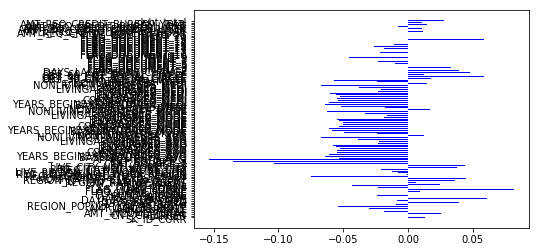

In [23]:
size = 1000
sample = train.head(size)
other = train.tail(len(train) - size)

labels = []
dats = []
for column in train:
	'''
	if train[column].dtype != 'O': continue
	
	other[column] = other[column].fillna('none')
	sample[column] = sample[column].fillna('none')
	dic = other.groupby([column])['TARGET'].mean().to_dict()
	feature = sample[column].map(dic)
	cor = np.corrcoef(sample['TARGET'],feature)[0][1]
	labels+=[column]
	dat +=[cor]
	'''
	if not (train[column].dtype.kind in 'bif'): continue
	try:
		
		dat = sample[['TARGET',column]].fillna(0)
		
		dat= dat[pd.notnull(dat[column])]
		print(column,np.corrcoef(dat['TARGET'],dat[column])[0][1])
		c = np.corrcoef(dat['TARGET'],dat[column])[0][1]
		labels+=[column]
		dats +=[c]
	except:
		pass
	
	
len(labels)
plt.barh(labels, dats, .5, color="blue")

In [15]:
labels

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [49]:
sample['DAYS_REGISTRATION'].dtype == 'O'

dtype('float64')

In [20]:
train[['AMT_INCOME_TOTAL','TARGET']]

,AMT_INCOME_TOTAL,TARGET
208731,90000.0,0
80573,1125000.0,0
33554,247500.0,0
209779,90000.0,0
56542,99000.0,0
203492,56700.0,0
299303,135000.0,0
231972,90000.0,1
91267,202500.0,0
147861,180000.0,0


In [8]:
train['AMT_INCOME_TOTAL']

In [9]:
395.7585224593592 * .05

19.78792612296796

In [60]:
train['OCCUPATION_TYPE'] = train['OCCUPATION_TYPE'].fillna('none')
df = train.groupby(['OCCUPATION_TYPE'])['TARGET'].mean()

df.to_dict()

{'Accountants': 0.04830327117089575,
 'Cleaning staff': 0.09606705351386202,
 'Cooking staff': 0.10443995963673057,
 'Core staff': 0.06303953572723975,
 'Drivers': 0.11326130194054722,
 'HR staff': 0.06394316163410302,
 'High skill tech staff': 0.06159929701230228,
 'IT staff': 0.06463878326996197,
 'Laborers': 0.10578769977892943,
 'Low-skill Laborers': 0.17152412804586717,
 'Managers': 0.06214028356183613,
 'Medicine staff': 0.06700245988052009,
 'Private service staff': 0.06598793363499246,
 'Realty agents': 0.07856191744340879,
 'Sales staff': 0.0963179864182917,
 'Secretaries': 0.07049808429118774,
 'Security staff': 0.10742449040321381,
 'Waiters/barmen staff': 0.11275964391691394,
 'none': 0.06513056198192778}

In [29]:
train['DAYS_EMPLOYED'][:10]

0      -637
1     -1188
2      -225
3     -3039
4     -3038
5     -1588
6     -3130
7      -449
8    365243
9     -2019
Name: DAYS_EMPLOYED, dtype: int64

In [37]:
train.groupby(['employed'])['TARGET'].count()	

employed
-1014.583333    55374
 0.000000          42
 0.083333         141
 0.166667         322
 0.250000        1388
 0.333333        3294
 0.416667        2801
 0.500000        3299
 0.583333        3623
 0.666667        3461
 0.750000        2709
 0.833333        2670
 0.916667        2404
 1.000000        2805
 1.083333        2997
 1.166667        2924
 1.250000        2633
 1.333333        2697
 1.416667        2411
 1.500000        2628
 1.583333        2443
 1.666667        2652
 1.750000        2315
 1.833333        2496
 1.916667        2345
 2.000000        2771
 2.083333        2532
 2.166667        2576
 2.250000        2515
 2.333333        2548
 2.416667        2413
 2.500000        2465
 2.583333        2434
 2.666667        2526
 2.750000        2189
 2.833333        2313
 2.916667        2212
 3.000000        2460
 3.083333        2304
 3.166667        2271
 3.250000        2180
 3.333333        2324
 3.416667        2046
 3.500000        2089
 3.583333        2025
 

In [14]:

train.loc[train['CNT_CHILDREN'] == 19]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,debt_income_ratio
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,225000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.007020,-11057,-1853,-3096.0,-745,NaN,1,1,1,1,1,0,Waiters/barmen staff,20.0,2,2,SUNDAY,11,0,0,0,0,0,0,Restaurant,NaN,0.553968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,-744.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,240.0
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,135000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.015221,-10297,-896,-4733.0,-2599,NaN,1,1,0,1,1,0,Core staff,20.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.779779,0.167332,0.574447,0.1399,0.1232,0.9866,0.7416,0.0209,0.1732,0.1379,0.3021,0.2083,0.0979,0.0504,0.1836,0.0,0.1177,0.063,0.0552,0.9811,0.7517,0.0211,0.0,0.1379,0.1667,0.2083,0.0278,0.0551,0.0565,0.0,0.0,0.0874,0.1232,0.9831,0.7451,0.0211,0.12,0.1379,0.25,0.2083,0.0804,0.0513,0.0705,0.0,0.0872,reg oper account,block of flats,0.0427,Panel,No,1.0,0.0,1.0,0.0,-2495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,120.0


In [103]:
train['income_round'] = train['AMT_INCOME_TOTAL'].round(-4)
income = train.groupby(['income_round'])['TARGET'].mean().head(10).to_frame()

In [63]:
train['AMT_INCOME_TOTAL'].min()

25650.0

208731     3.040400
80573      1.119668
33554      3.090909
209779     7.500000
56542      4.020364
203492     9.193651
299303     3.508600
231972     5.965750
91267      3.333333
147861     3.648950
43208      2.004900
175326     2.396000
102554     2.695238
130729     5.751520
57236      5.990000
20869      3.768167
271524     4.090000
185136     5.097872
48962      3.189500
147395     2.480095
281015     2.995000
132550     0.825067
91124      1.528000
4858       2.333333
199964     7.193281
260213     3.457850
69854      3.333333
131571     4.038462
102193     2.647059
9286       6.435556
247077     2.500000
83234      3.333333
240479     2.666667
126784     2.852933
190263     0.909091
254356     2.142857
112681     2.857143
126756     1.396000
49071      2.612308
304186     4.554400
50913      3.844444
86744      2.595429
65149      4.844800
26665      6.666667
259604     0.717703
3465       1.580000
59994      3.000000
223972     2.250000
75102      5.726000
189594     6.131727


In [98]:
income.columns

Index(['TARGET'], dtype='object')

In [56]:
train_set['DAYS_BIRTH'].isnull().values.any()


False

In [72]:
train_set = train.head(int(len(train) / 2))
test_set = train.tail(int(len(train) / 2))

from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import roc_auc_score

def reshape(col):
	return np.array(col.tolist()).reshape((len(col),1))
#regr = linear_model.LinearRegression()
#regr.fit(reshape(train_set['DAYS_BIRTH']), train_set['TARGET'])

#y_pred = regr.predict(reshape(test_set['DAYS_BIRTH']))
x = np.array(test_set['DAYS_EMPLOYED'].tolist()) * -1
y_pred = 1.2856933456702857e-001 * x**0 + -8.6922310523566519e-003 * x**1 +  2.0815557728797197e-004 * x**2

roc_auc_score(1- np.array(test_set['TARGET'].tolist()),y_pred)

0.5905990063821853

In [47]:
np.array([12,3,3,4,5,34,53,4,5,456,4,3]).reshape((12,1))

array([[ 12],
       [  3],
       [  3],
       [  4],
       [  5],
       [ 34],
       [ 53],
       [  4],
       [  5],
       [456],
       [  4],
       [  3]])

In [65]:
len(y_pred)

307511